# Avacado Project

## Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from math import sqrt
import warnings
warnings.simplefilter("ignore")

## Loading Data

In [129]:
df=pd.read_csv("avocado dataset.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## Understanding the DataSet

In [130]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Date - The date of the observation
AveragePrice - the average price of a single avocado (Target Column)
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

We can drop column Unnamed: 0

## Exploratory Data Analysis (EDA)

In [131]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [132]:
#dropping the Unnamed Column
df.drop("Unnamed: 0",axis=1,inplace=True)

In [133]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [135]:
df.shape

(18249, 13)

In [136]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [137]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [138]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values present in the columns

<AxesSubplot:>

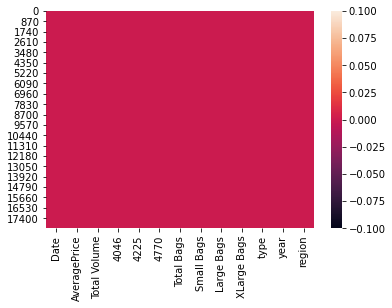

In [139]:
#Heatmap representing the columns are not null
sns.heatmap(df.isnull())

The Graph represents no null values in the columns

In [140]:
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

Unique Value count for the target feature

In [141]:
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.05      1
3.03      1
2.91      1
0.48      1
2.96      1
Name: AveragePrice, Length: 259, dtype: int64

Above are the value counts of the target column

In [142]:
df.loc[df["AveragePrice"]==' ']

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


No Empty observation in the target columns

Extracting Date and month from Date Column in order to change the datatype

In [143]:
df["Date"]=pd.to_datetime(df["Date"])

In [144]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

The datatype of the Date column is now changed from Object Data type to Float 

In [145]:
#Extracting month from Date column
df["Month"]=df["Date"].dt.month

df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [146]:
#Extracting day from Date column
df["Day"]=df["Date"].dt.day

In [147]:
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20


Month and Day column has been created.

As we do not require the Day column anymore, dropping it would be a good choice.

In [148]:
df = df.drop(["Date"],axis=1)

In [149]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [150]:
df.shape

(18249, 14)

## Summary Statistics

In [151]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.372842,15.466984
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.525034,8.984552
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,10.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


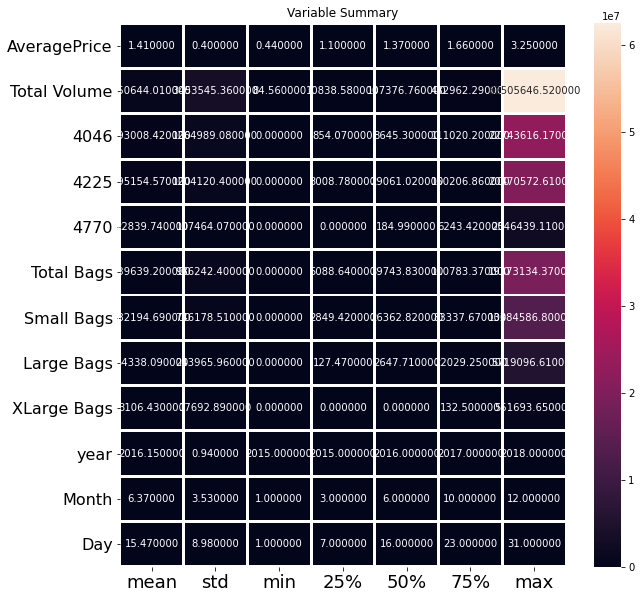

In [152]:
plt.figure(figsize=(10,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title("Variable Summary")
plt.show()

from the above plotting we are determining the mean, Standard deviation, minimum and maximum value of each column.

It helps us further in data cleaning.

Total no of rows in the dataset: 1.Rows= 18249 2.Columns =14

In above description some of column having outlier and skewness.we will observe the data using some other techniques.

## Visualization

### Univariate Analysis:

Dividing the columns with continous data and categorical data into two lists.

In [153]:
cont_cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
cat_cols = ['year', 'Day', 'Month', 'type', 'region']

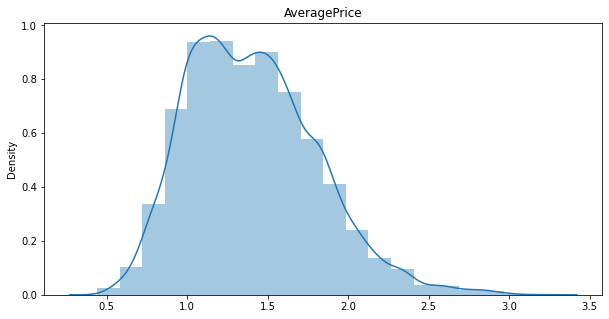

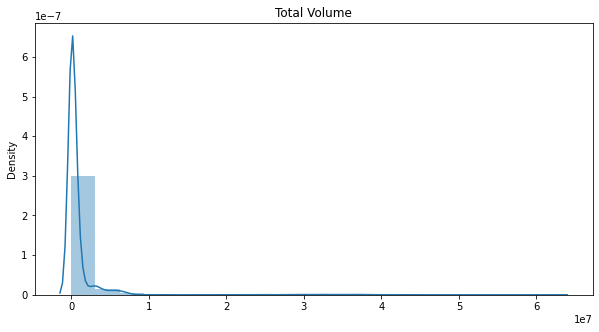

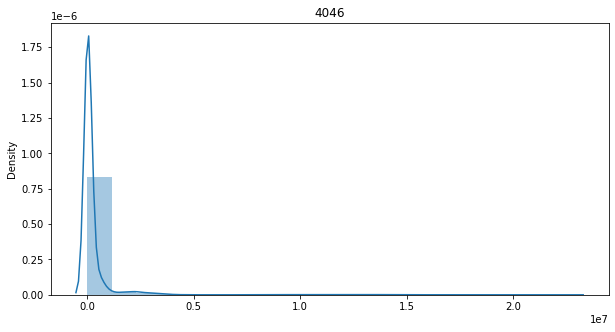

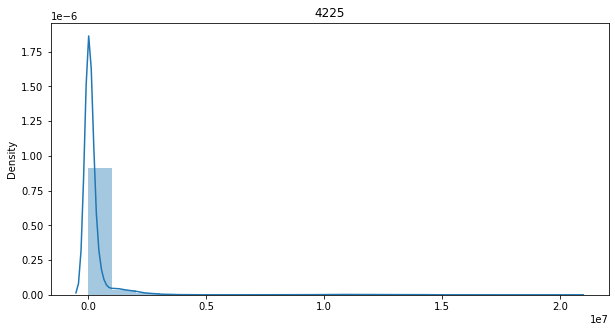

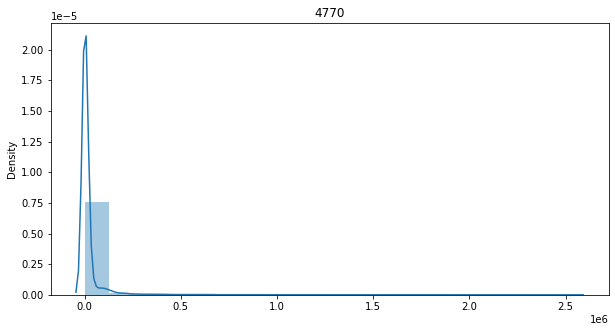

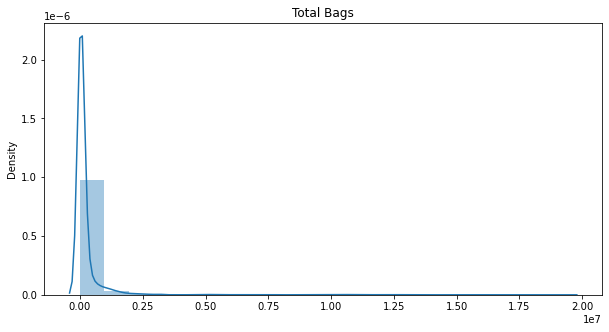

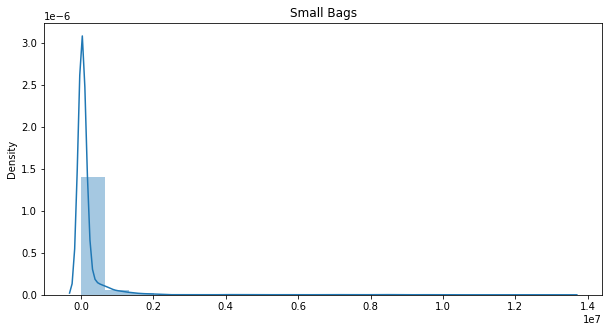

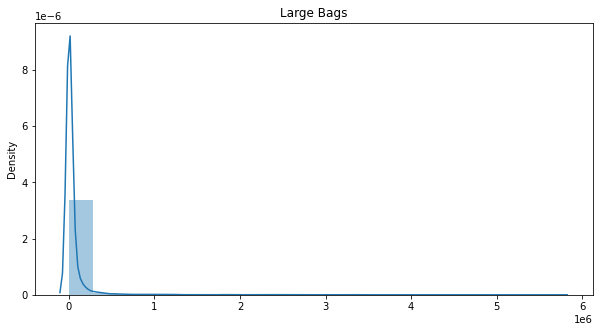

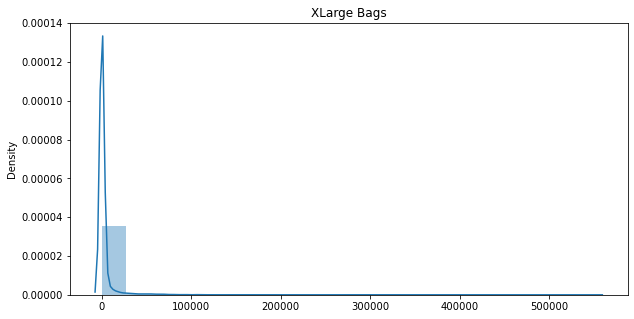

In [154]:
for i in df[cont_cols]:
    plt.figure(figsize=(10,5))
    sns.distplot(x=df[i],bins=20)
    plt.title(i)
    plt.show()

We can observe that all the columns are skewed except for the target column

Visualization for the categorical columns

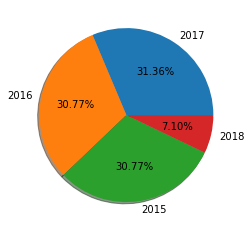

In [155]:
#Plotting pie chart for years
labels='2017','2016','2015','2018'
fig, ax = plt.subplots()
ax.pie(df['year'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

We can observer that the sales of Avacado in the year 2017 is the most

<AxesSubplot:xlabel='Month', ylabel='count'>

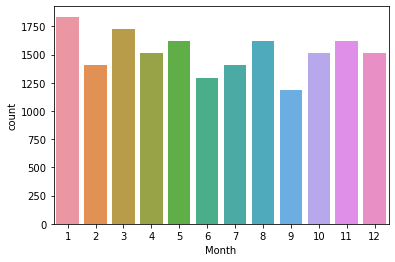

In [156]:
#Count plot for Month
sns.countplot(df['Month'])

In the month of January and March the count is the most

In [157]:
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

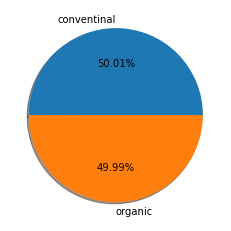

In [158]:
labels='conventinal','organic'
fig, ax = plt.subplots()
ax.pie(df['type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

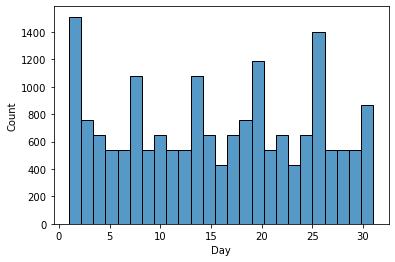

In [159]:
#Count plot for Month
sns.histplot(df['Day']);

The count is high on 6 days

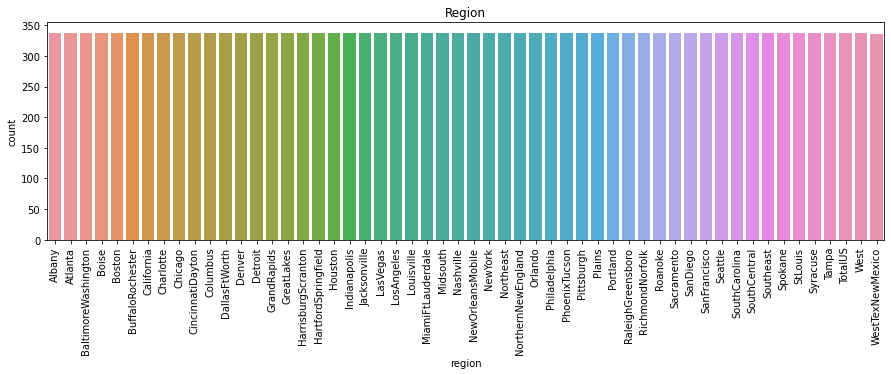

In [160]:
plt.figure(figsize=(15,4))
sns.countplot(df["region"])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

In all the regions the count is almost same which means there is equal importance in the regions for avacado.

## Bivariate Analysis:

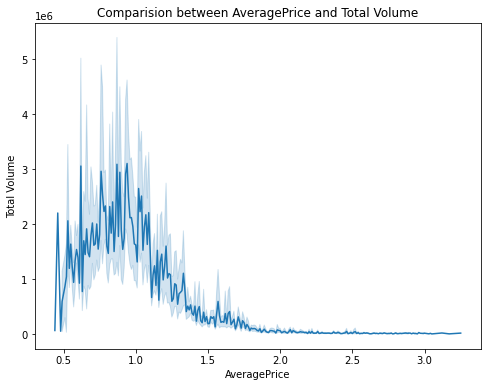

In [161]:
#Comparision between features using line plot
plt.figure(figsize=[8,6])
plt.title('Comparision between AveragePrice and Total Volume')
sns.lineplot(df['AveragePrice'],df['Total Volume']);

The average price is between 0.5 to 1.5 then the Total Volume is between 0-3

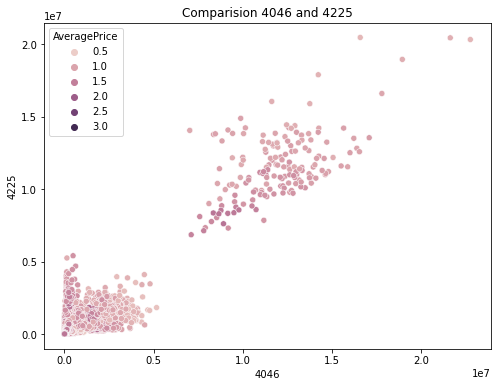

In [162]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision 4046 and 4225')
sns.scatterplot(df['4046'],df['4225'],hue=df["AveragePrice"]);

The points are dense in 0 to 0.5 for both 4046 and 4225 PLU, which means these both has less AveragePrice count.

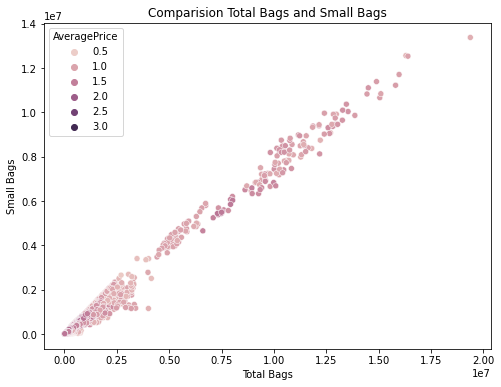

In [163]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision Total Bags and Small Bags')
sns.scatterplot(df['Total Bags'],df['Small Bags'],hue=df["AveragePrice"]);

We can observe a linear distribution of Total bags and Small bags.

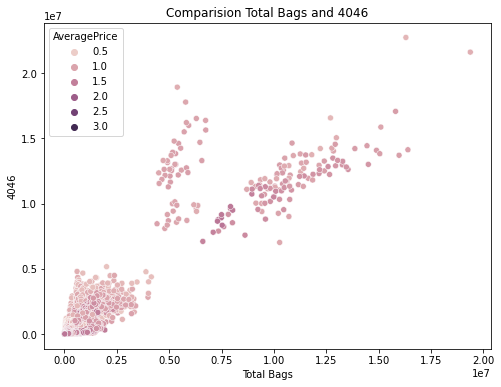

In [164]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision Total Bags and 4046')
sns.scatterplot(df['Total Bags'],df['4046'],hue=df["AveragePrice"]);

Above plot says that the count is more with less Total Bags and 4046 PLU.

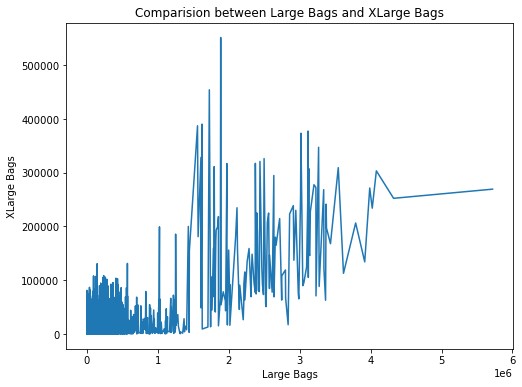

In [165]:
#Comparision between features using line plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Large Bags and XLarge Bags')
sns.lineplot(df['Large Bags'],df['XLarge Bags']);

We can observe some extreme outliers here. We will remove the outliers later using different tecniquesM

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

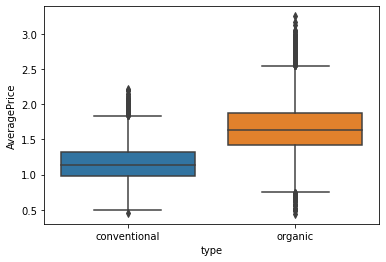

In [166]:
sns.boxplot(x='type',y='AveragePrice',data=df)

Average price is more for them organic avacado

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

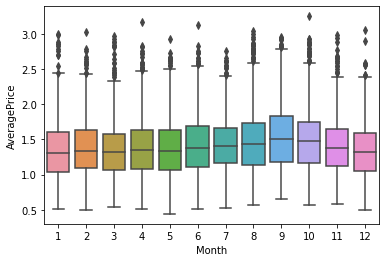

In [167]:
sns.boxplot(x='Month',y='AveragePrice',data=df)

In september the Average Price for Avacado is high. Also we can notice some outliers too

<AxesSubplot:xlabel='Day', ylabel='AveragePrice'>

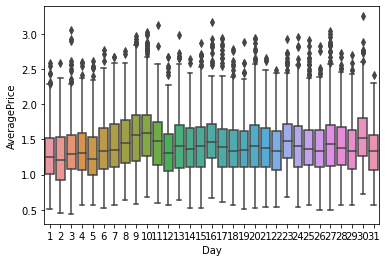

In [168]:
sns.boxplot(x='Day',y='AveragePrice',data=df)

## Multivariate Analysis:

In [169]:
#pair ploting for df
#sns.pairplot(df,hue="AveragePrice")

Most of the pair plots are linear but there is some outliers and skewness present.

## Data Cleaning

## Checking for outliers:

<AxesSubplot:>

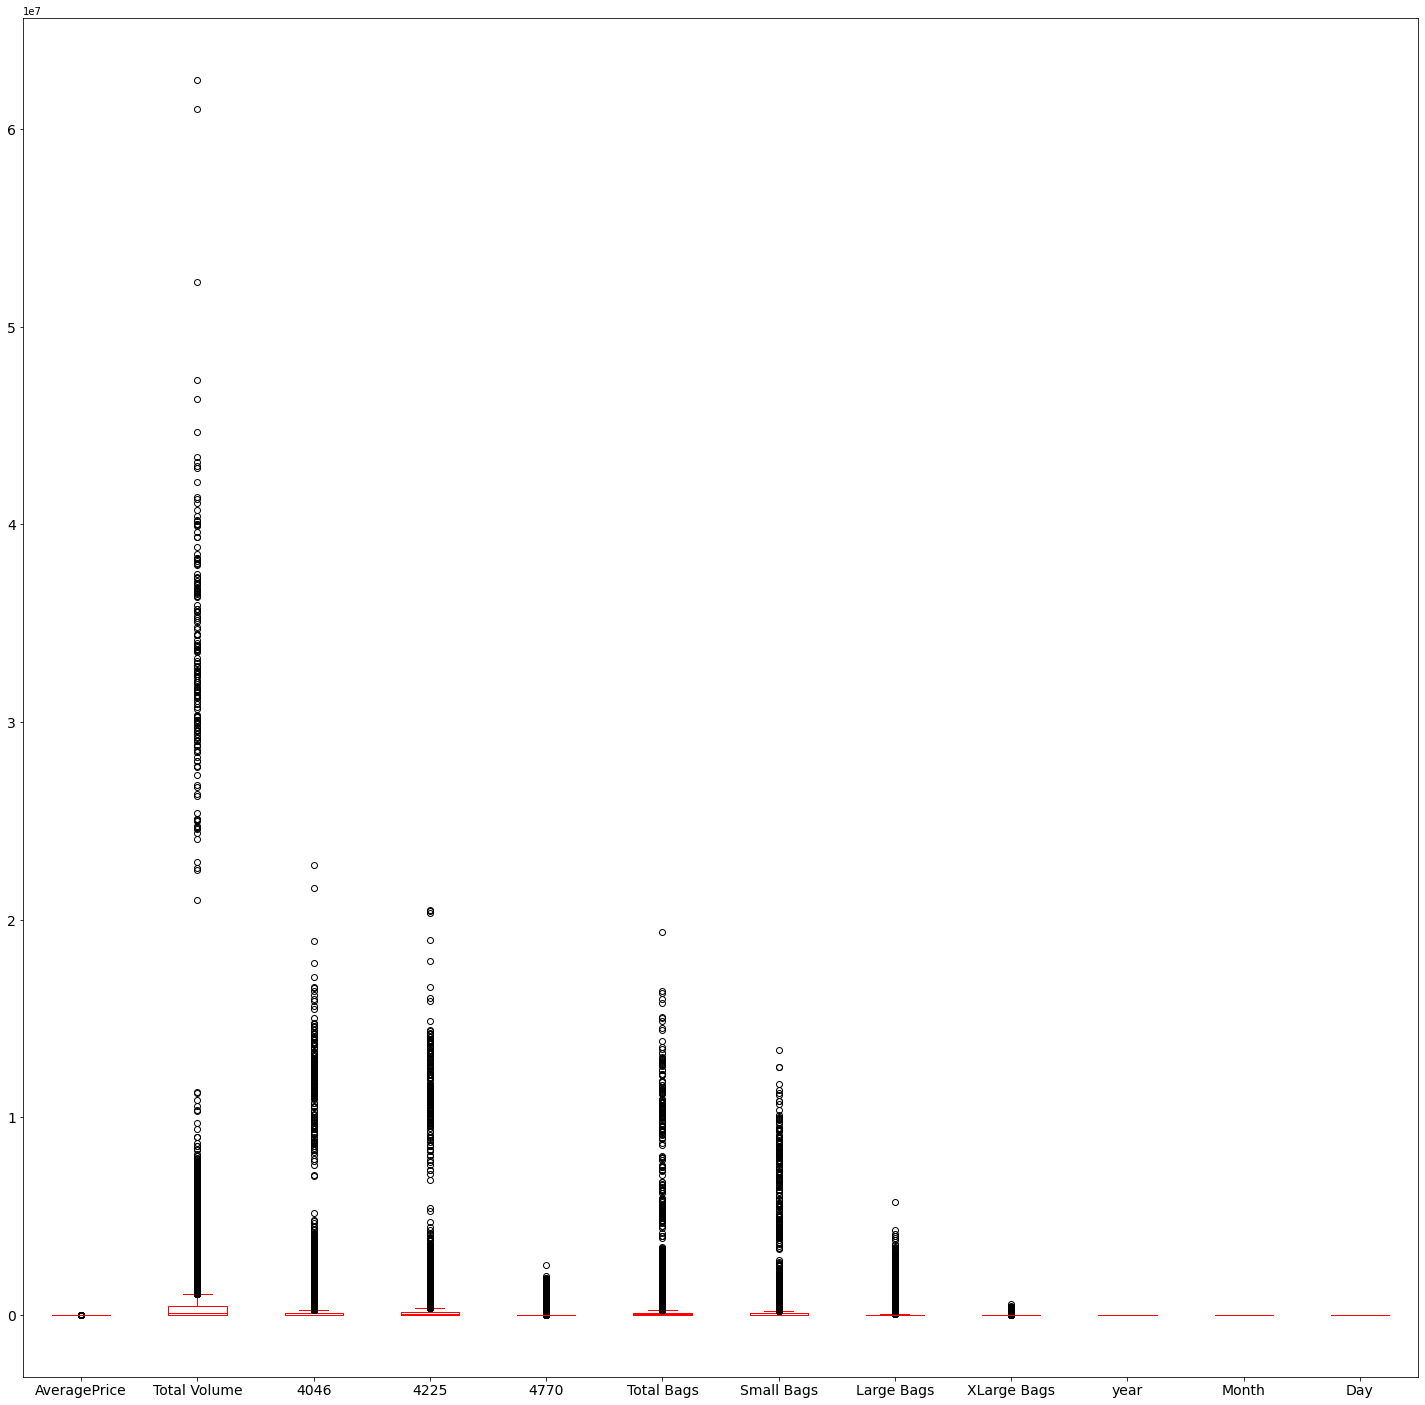

In [170]:
df.plot(kind='box',fontsize=14,figsize=(25,25),color='r')

From above graph, we can observer that there are outliers present in all continuous columns. 

## Removing Outliers:

### Splitting the data

Splitting the Dataframe as we only need to remove outliers from below columns.

Total Volume
4046
4225
4770
Total Bags
Small Bags
Large Bags
XLarge Bags

We don't need to remove outliers from target column as it might manipulate the data set and does not provide the accurate outcome. 

Below columns are categorical columns and does not require to be treated.
Year
Month
Day
Region
Type

### 1) Z-Score Method

In [171]:
data=df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

In [172]:
from scipy.stats import zscore
z=np.abs(zscore(data))
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [173]:
df_new.shape

(17782, 14)

In [174]:
df.shape

(18249, 14)

#### Loss Percent of data while removing the outliers using z-score

In [175]:
loss=(18249 - 17782)/ 18249*100
loss

2.55904433119623

### 2) IQR Method

In [176]:
# 1st quantile
Q1=data.quantile(0.25)

# 3rd quantile
Q3=data.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [177]:
df_1.shape

(11747, 14)

In [178]:
df.shape

(18249, 14)

#### Loss Percent of data while removing the outliers using IQR

In [179]:
loss=(18249 - 11747)/ 18249*100
loss

35.62934955340019

While comparing the percentage loss using z-score and IQR, the loss percentage is less in z-score so it is preferred.

## Checking for Skewness:

In [180]:
#Checking for skewness
df_new.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

In [182]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


Skewness can be present in all the columns except for the categorical column

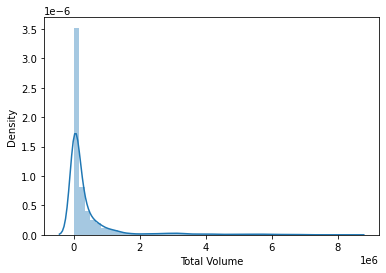

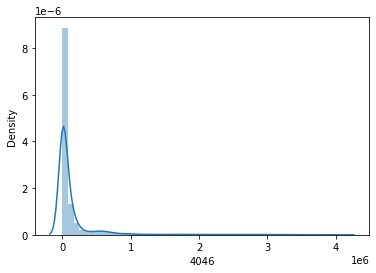

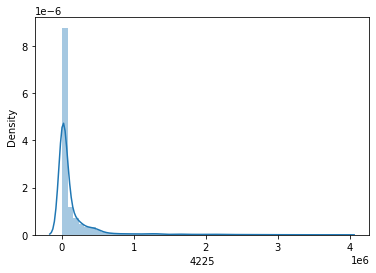

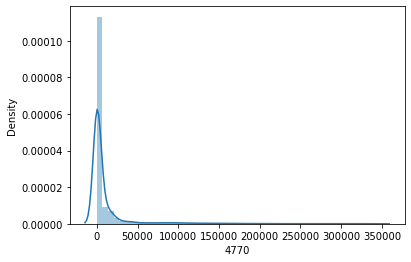

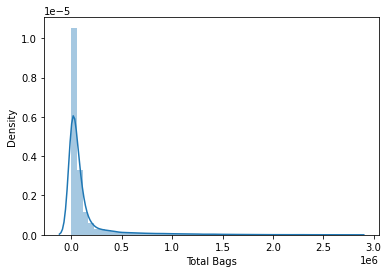

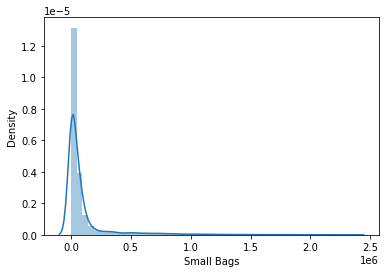

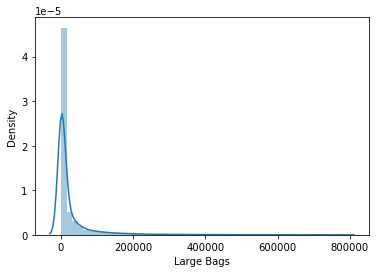

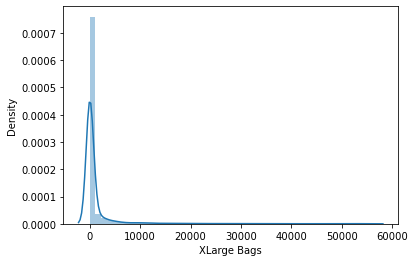

In [183]:
import seaborn as sns
data_new=df_new[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
#Distribution of data

for i in data_new:
    plt.figure()
    sns.distplot(data_new[i])

As observed above all the columns have skewness

## Removing Skewness:

We will remove skewness from the continuous columns (data_new list)

In [184]:
data_new.dtypes

Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
dtype: object

In [185]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [187]:
df_new['Total Volume']=np.log1p(df_new['Total Volume'])
df_new['4046']=np.sqrt(df_new['4046'])
df_new['4225']=np.log1p(df_new['4225'])
df_new['4770']=np.log1p(df_new['4770'])
df_new['Total Bags']=np.log1p(df_new['Total Bags'])
df_new['Small Bags']=np.log1p(df_new['Small Bags'])
df_new['Large Bags']=np.log1p(df_new['Large Bags'])
df_new['XLarge Bags']=np.log1p(df_new['XLarge Bags'])

In [188]:
df_new.skew()

AveragePrice    0.560969
Total Volume   -0.039041
4046            2.507960
4225           -0.595360
4770            0.079074
Total Bags     -0.394347
Small Bags     -0.782875
Large Bags     -0.603830
XLarge Bags     1.225926
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

We can see that the skewness is removed from almost all the dataset

## Label Encoding:

As we have categorical columns present in the Data set, we will encode the values.

In [189]:
cols = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cols]= df_new[cols].apply(LE.fit_transform)

In [190]:
df_new[cols].head()

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [191]:
df_new.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,11.070344,32.198447,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0,12,27
1,1.35,10.912867,25.966902,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0,12,20


In [192]:
df_new["type"].value_counts()

1    9123
0    8659
Name: type, dtype: int64

## Correlation

In [193]:
df_new.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576957,-0.479731,-0.429352,-0.492918,-0.567930,-0.479438,-0.463904,-0.359220,0.608447,0.099910,0.010428,0.071568,0.058266
Total Volume,-0.576957,1.000000,0.741430,0.899785,0.818355,0.926452,0.862657,0.643727,0.614847,-0.801035,0.077904,0.065468,-0.015222,-0.010437
4046,-0.479731,0.741430,1.000000,0.593889,0.616259,0.666076,0.623539,0.492134,0.549668,-0.560852,-0.018189,0.142459,-0.010323,-0.011280
4225,-0.429352,0.899785,0.593889,1.000000,0.775408,0.768688,0.694881,0.584879,0.543259,-0.730636,0.003861,0.031982,-0.018579,-0.007039
4770,-0.492918,0.818355,0.616259,0.775408,1.000000,0.750925,0.724027,0.525859,0.604235,-0.779431,-0.053770,0.034927,-0.012655,-0.000940
Total Bags,-0.567930,0.926452,0.666076,0.768688,0.750925,1.000000,0.921235,0.685744,0.583925,-0.722288,0.222253,0.058726,-0.003499,-0.008766
Small Bags,-0.479438,0.862657,0.623539,0.694881,0.724027,0.921235,1.000000,0.487238,0.551486,-0.702359,0.200972,0.034848,-0.001478,-0.005396
Large Bags,-0.463904,0.643727,0.492134,0.584879,0.525859,0.685744,0.487238,1.000000,0.421122,-0.482052,0.191830,0.074123,-0.002176,-0.004156
XLarge Bags,-0.359220,0.614847,0.549668,0.543259,0.604235,0.583925,0.551486,0.421122,1.000000,-0.623755,0.163335,-0.033942,0.011796,0.010472
type,0.608447,-0.801035,-0.560852,-0.730636,-0.779431,-0.722288,-0.702359,-0.482052,-0.623755,1.000000,0.007399,0.021970,-0.003290,-0.003108


In [194]:
df_new.corr().duplicated(subset='AveragePrice')

AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
Month           False
Day             False
dtype: bool

<AxesSubplot:>

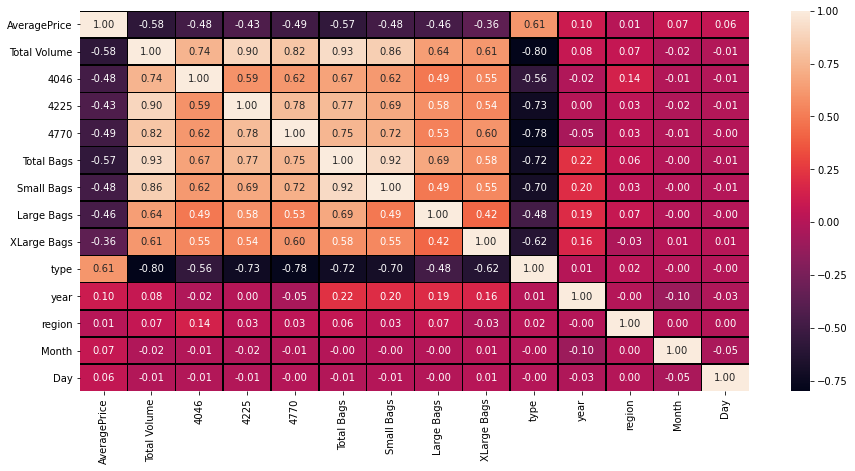

In [195]:
plt.figure(figsize=(15,7))
sns.heatmap(df_new.corr(),annot=True,linewidth=0.5,linecolor='black',fmt=".2f")

By looking into the heat map these are my observations on independent features.

Total Bags and Small Bags are highly correlated with each other.
Total Volume and Small Bags are highly correlated with each other.
Total Volume and Total Bags are highly correlated with each other.
Total Volume and 4225 are highly correlated with each other.
I can see negative correlation but not more than -0.8
To get better insight on target correlation let me plot bar plot.

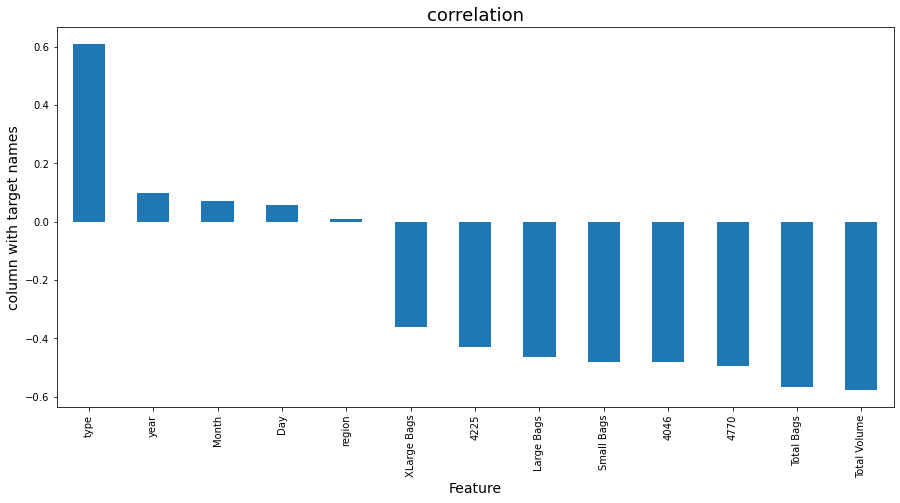

In [196]:
plt.figure(figsize=(15,7))
df_new.corr()['AveragePrice'].sort_values(ascending=False).drop("AveragePrice").plot(kind='bar')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("column with target names",fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Day and region are weakly correlated to the target, hence we can drop the columns

In [197]:
#Droping Day and region column
df_new = df_new.drop(["Day"],axis=1)
df_new = df_new.drop(["region"],axis=1)

In [198]:
df_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,1.33,11.070344,32.198447,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,12
1,1.35,10.912867,25.966902,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,12
2,0.93,11.680313,28.190424,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,12
3,1.08,11.277116,33.645208,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,6
4,1.28,10.840377,30.683546,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,11


## Preprocessing

In [199]:
x = df_new.drop("AveragePrice",axis=1)
y = df_new["AveragePrice"]

## Scaling the data using Standard Scaler:

In [200]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [201]:
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

## Using VIF(Variance inflation factor) to remove multicolinearity:

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,28.176595,Total Volume
1,2.727167,4046
2,7.496751,4225
3,3.931989,4770
4,20.077690,Total Bags
5,9.437026,Small Bags
6,2.658952,Large Bags
7,1.981834,XLarge Bags
8,3.560679,type
9,1.375751,year


Since VIF for Total Volume is way more, we will drop the column

In [203]:
#Droping Total Volume column
X = X.drop(["Total Volume"],axis=1)

In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,2.103406,4046
1,3.419053,4225
2,3.931790,4770
3,14.459452,Total Bags
4,9.392485,Small Bags
5,2.647563,Large Bags
6,1.979163,XLarge Bags
7,3.263265,type
8,1.361520,year
9,1.018073,Month


Since VIF for Total Bags is way more, we will drop the column

In [205]:
#Droping Total Bags column
X = X.drop(["Total Bags"],axis=1)

In [206]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,2.073058,4046
1,3.246930,4225
2,3.929824,4770
3,3.065154,Small Bags
4,1.728752,Large Bags
5,1.979139,XLarge Bags
6,3.256791,type
7,1.335517,year
8,1.017746,Month


Now the multicolinearity issue has solved.So i can proceed with model building.

## Finding Best Random State and Accuracy:

In [207]:

from sklearn.neighbors import KNeighborsRegressor as KNN
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=.30, random_state =i)
    mod = KNN()
    mod.fit(x_train_b, y_train_b)
    pred = mod.predict(x_test_b)
    acc=r2_score(y_test_b, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7107886817352604  on Random_state  1


## Regression Algorithms:

In [208]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

### 1) Linear Regression:

In [209]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
lr.fit(x_train,y_train)
prec =lr.predict(x_test)

lrr = r2_score(y_test,prec)
print('R2 Score:',lrr*100)

lrscore = cross_val_score(lr,X,y,cv=3)
lrc = lrscore.mean() 
print('Cross Val Score:',lrc*100)

R2 Score: 47.681243602995224
Cross Val Score: 4.089387626412167


#### Performance of the model

In [210]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,prec))
print('Mean Squared Error:',mean_squared_error(y_test_b,prec))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,prec)))

Error:
Mean Absolute Error: 0.22393296297848428
Mean Squared Error: 0.08404800226972704
Root Mean Square Error: 0.2899103348791261


Linear Regression is givng me only 47% of r2_score.

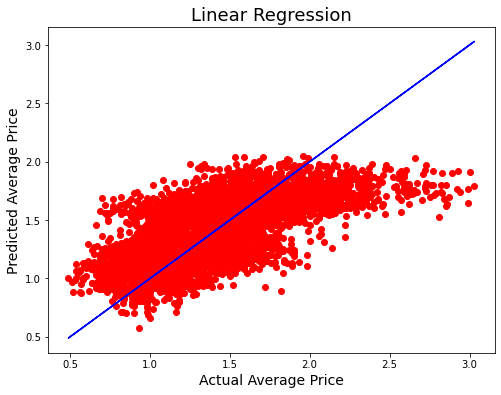

In [211]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=prec, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Average Price',fontsize=14)
plt.ylabel('Predicted Average Price',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

### 2) RandomForestRegressor:

In [212]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

print("Cross Val Score",cross_val_score(RFR,X,y,cv=5).mean())


R2_score: 0.8069283496497548
Cross Val Score 0.2867981989282692


#### Performance of the model

In [213]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred)))

Error:
Mean Absolute Error: 0.12203392689784444
Mean Squared Error: 0.031016193090909087
Root Mean Square Error: 0.17611414790103913


RandomForestRegressor is givng me only 80% of r2_score.

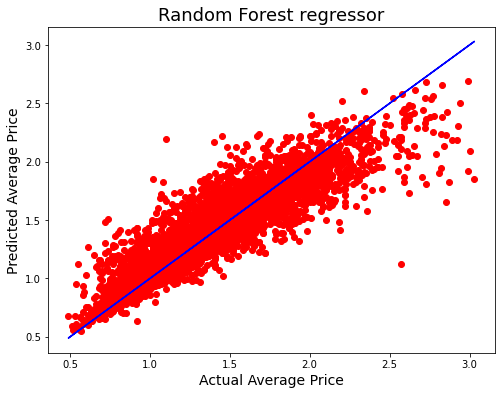

In [214]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Average Price',fontsize=14)
plt.ylabel('Predicted Average Price',fontsize=14)
plt.title('Random Forest regressor',fontsize=18)
plt.show()

### 3) SGD:

In [215]:
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

print("Cross Val Score",cross_val_score(sgd,X,y,cv=5).mean())

R2_score: 0.47556838875149055
Cross Val Score 0.10194620368271394


#### Performance of the model

In [216]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred)))

Error:
Mean Absolute Error: 0.22441625255929687
Mean Squared Error: 0.08424785351942109
Root Mean Square Error: 0.2902548079178381


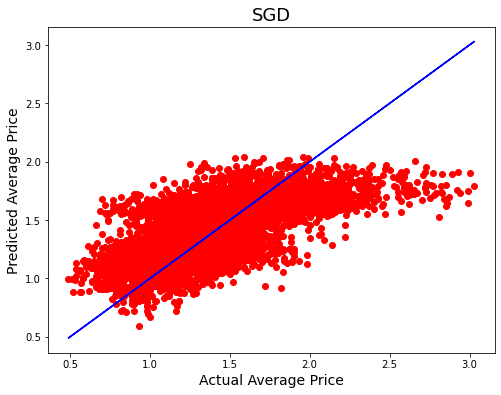

In [217]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Average Price',fontsize=14)
plt.ylabel('Predicted Average Price',fontsize=14)
plt.title('SGD',fontsize=18)
plt.show()

SGD is givng me only 47% of r2_score.

### 4) Gradient Boosting:

In [220]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred=GBR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

print("Cross Val Score",cross_val_score(GBR,X,y,cv=5).mean())

R2_score: 0.6561428856708473
Cross Val Score 0.31354949323719744


#### Performance of the Model

In [221]:
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

mean_squared_error: 0.055239278445947455
mean_absolute_error: 0.1767512367914835
root_mean_squared_error: 0.23503037770881333


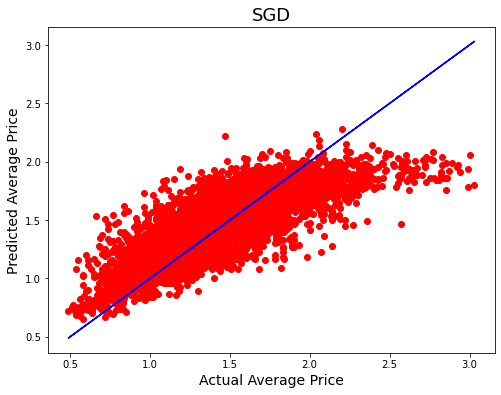

In [222]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Average Price',fontsize=14)
plt.ylabel('Predicted Average Price',fontsize=14)
plt.title('SGD',fontsize=18)
plt.show()

Gradient Boosting: is givng me only 65% of r2_score.

### 5) KNN

In [223]:
knn=KNN()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

print(cross_val_score(knn,X,y,cv=5).mean())

R2_score: 0.7107886817352604
0.14337905783889268


#### Peformance of the model

In [224]:
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

mean_squared_error: 0.04646064854732895
mean_absolute_error: 0.1514526710402999
root_mean_squared_error: 0.21554732322005057


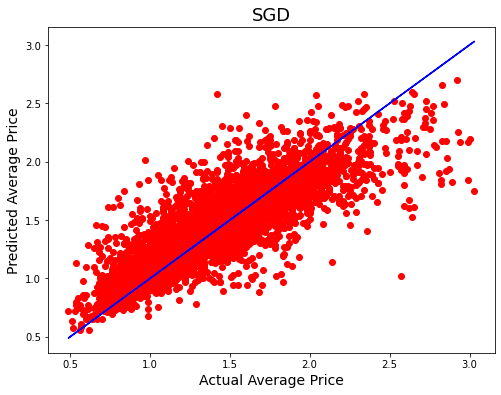

In [225]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Average Price',fontsize=14)
plt.ylabel('Predicted Average Price',fontsize=14)
plt.title('SGD',fontsize=18)
plt.show()

KNN is givng me only 71% of r2_score.

By comparing the accuracy score and cross Validation score, found KNN as best model.

## Hyper Parameter Tuning:

In [226]:
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameter = {'n_neighbors':[1,2,3,4],
            'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree','kd_tree','brute'],
            'n_jobs':[10,20,30,40]}
GCV=GridSearchCV(KNN(),parameter,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'algorithm': 'brute', 'n_jobs': 10, 'n_neighbors': 4, 'weights': 'distance'}

In [227]:
Final_mod=KNN(algorithm='brute',n_jobs=10,n_neighbors=4,weights='distance')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 72.74443377052562
mean_squared_error: 0.04378498362871453
mean_absolute_error: 0.1438413017803881
RMSE value: 0.20924861679044507


## Saving the model:

In [228]:
# Saving the model using .pkl
import joblib
job=joblib.dump(Final_mod,"Avacado.obj")
job

['Avacado.obj']

## Conclusion:

In [229]:
import numpy as np
a=np.array(y_test)
a

array([1.22, 1.64, 1.8 , ..., 1.81, 1.55, 1.97])

In [230]:
predicted=np.array(knn.predict(x_test))
predicted

array([1.176, 1.614, 1.472, ..., 1.812, 1.582, 1.85 ])

In [231]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))

In [232]:
df_com

,original,predicted
0,1.22,1.176
1,1.64,1.614
2,1.80,1.472
3,1.34,1.246
4,1.36,1.604
...,...,...
5330,1.41,1.498
5331,0.89,0.754
5332,1.81,1.812
5333,1.55,1.582


### From the above table the model is predicted the values with 70-75 percent accuracy.